In [1]:
from itertools import product

from models import Instance


instances = [
    Instance.read(f'..\\data\\anpcp{n}_{i}.tsp')
    for n, i in product((100, 500), range(20))
]
len(instances)

40

In [2]:
from models.solver import Solver


solvers_100 = [
    Solver(instances[0], 5, 2),
    Solver(instances[0], 5, 3),
    Solver(instances[0], 10, 2),
    Solver(instances[0], 10, 3)
]

solvers_500 = [
    Solver(instances[-1], 25, 2)
]

In [4]:
for solver in solvers_100:
    solver.grasp(2000, 0.4)

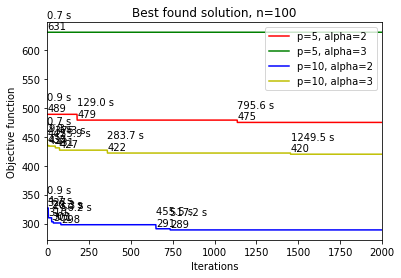

In [64]:
import matplotlib.pyplot as plt

%matplotlib inline

# plt.figure(figsize=(18, 6))

for solver, color in zip(solvers_100, ('r', 'g', 'b', 'y')):
    of_values = list()

    min_of = 1000
    total_time = 0
    for i, solution in enumerate(solver.history):
        total_time += solution.time

        if solution.objective_function < min_of:
            min_of = solution.objective_function
            
            plt.annotate(
                f'{total_time:.1f} s\n{min_of}',
                (i, min_of),
                xytext=(i, min_of + 5)
            )
        of_values.append(min_of)

    plt.plot(
        range(len(of_values)),
        of_values,
        color,
        label=f'p={solver.p}, alpha={solver.alpha}'
    )

plt.title('Best found solution, n=100')
plt.ylabel('Objective function')
plt.xlabel('Iterations')
plt.xlim(0, 2000)
plt.legend()

plt.show()